# Log returns plots

In [41]:
import pandas as pd
import numpy as np
import math
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [63]:
short_window = 21
long_window = 84

with open("data/Kraken_BTCUSD.pkl", "rb") as file:
    btc_kraken = pkl.load(file)
with open("data/Kraken_ETHUSD.pkl", "rb") as file:
    eth_kraken = pkl.load(file)

In [51]:
def plot_signal(log_returns):
    signal = log_returns["log_returns"].rolling(window=short_window).mean() - log_returns["log_returns"].rolling(window=long_window).mean()
    signal = signal[long_window:]
    plt.plot(log_returns["log_returns"].rolling(window=short_window).mean()[long_window:])
    plt.plot(log_returns["log_returns"].rolling(window=long_window).mean())
    signal[signal<=0] = 0
    return signal

In [69]:
def calc_performance(signal, returns):
    returns = returns[long_window:]
    daily_returns = returns*np.sign(signal)+1
    return daily_returns.cumprod()

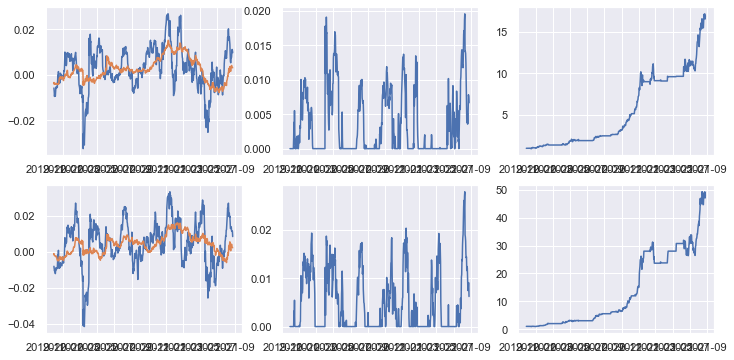

In [68]:
f = plt.figure(figsize=(12, 6))
gs = f.add_gridspec(2, 3)

ax = f.add_subplot(gs[0, 0])
btc_signal = plot_signal(btc_kraken)

ax = f.add_subplot(gs[1, 0])
eth_signal = plot_signal(eth_kraken)

ax = f.add_subplot(gs[0, 1])
plt.plot(btc_signal)

ax = f.add_subplot(gs[1, 1])
plt.plot(eth_signal)

ax = f.add_subplot(gs[0, 2])
plt.plot(calc_performance(signal, btc_kraken["close"].pct_change()))

ax = f.add_subplot(gs[1, 2])
plt.plot(calc_performance(signal, eth_kraken["close"].pct_change()))